In [3]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

In [4]:
diabetes = pd.read_csv('D:\Загрузки\diabetes.csv', encoding='windows-1251', sep='\t')

####  Получим статистические данные

In [5]:
diabetes.describe()

,Беременность,Глюкоза,АД,Толщина КС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Беременность      768 non-null    int64  
 1   Глюкоза           768 non-null    int64  
 2   АД                768 non-null    int64  
 3   Толщина КС        768 non-null    float64
 4   Инсулин           768 non-null    float64
 5   ИМТ               768 non-null    float64
 6   Наследственность  768 non-null    float64
 7   Возраст           768 non-null    int64  
 8   Диагноз           768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


#### Уберем выбросы и нестандартные данные:

In [8]:
diabetes.loc[(diabetes['Глюкоза'] == 0)].shape

(5, 9)

In [9]:
diabetes.loc[(diabetes['ИМТ'] == 0)].shape

(11, 9)

In [10]:
diabetes.loc[(diabetes['АД'] == 0)].shape

(35, 9)

In [12]:
diabetes.loc[(diabetes['Глюкоза'] == 0) | (diabetes['ИМТ'] == 0) | (diabetes['АД'] == 0)].shape

(44, 9)

In [13]:
diabetes.loc[(diabetes['Инсулин'] == 0)].shape

(374, 9)

In [14]:
diabetes.loc[(diabetes['ИМТ'] > 55) | (diabetes['ИМТ'] < 10)].shape

(14, 9)

In [15]:
diabetes.loc[(diabetes['Толщина КС'] == 0)].shape

(227, 9)

In [16]:
diabetes.loc[(diabetes['Инсулин'] > 300) | (diabetes['Инсулин'] < 12)].shape

(411, 9)

In [17]:
diabetes.loc[(diabetes['Беременность'] > 12)].shape

(14, 9)

In [18]:
diabetes.loc[(diabetes['Наследственность'] > 1)].shape

(51, 9)

#### Оценим распределение:

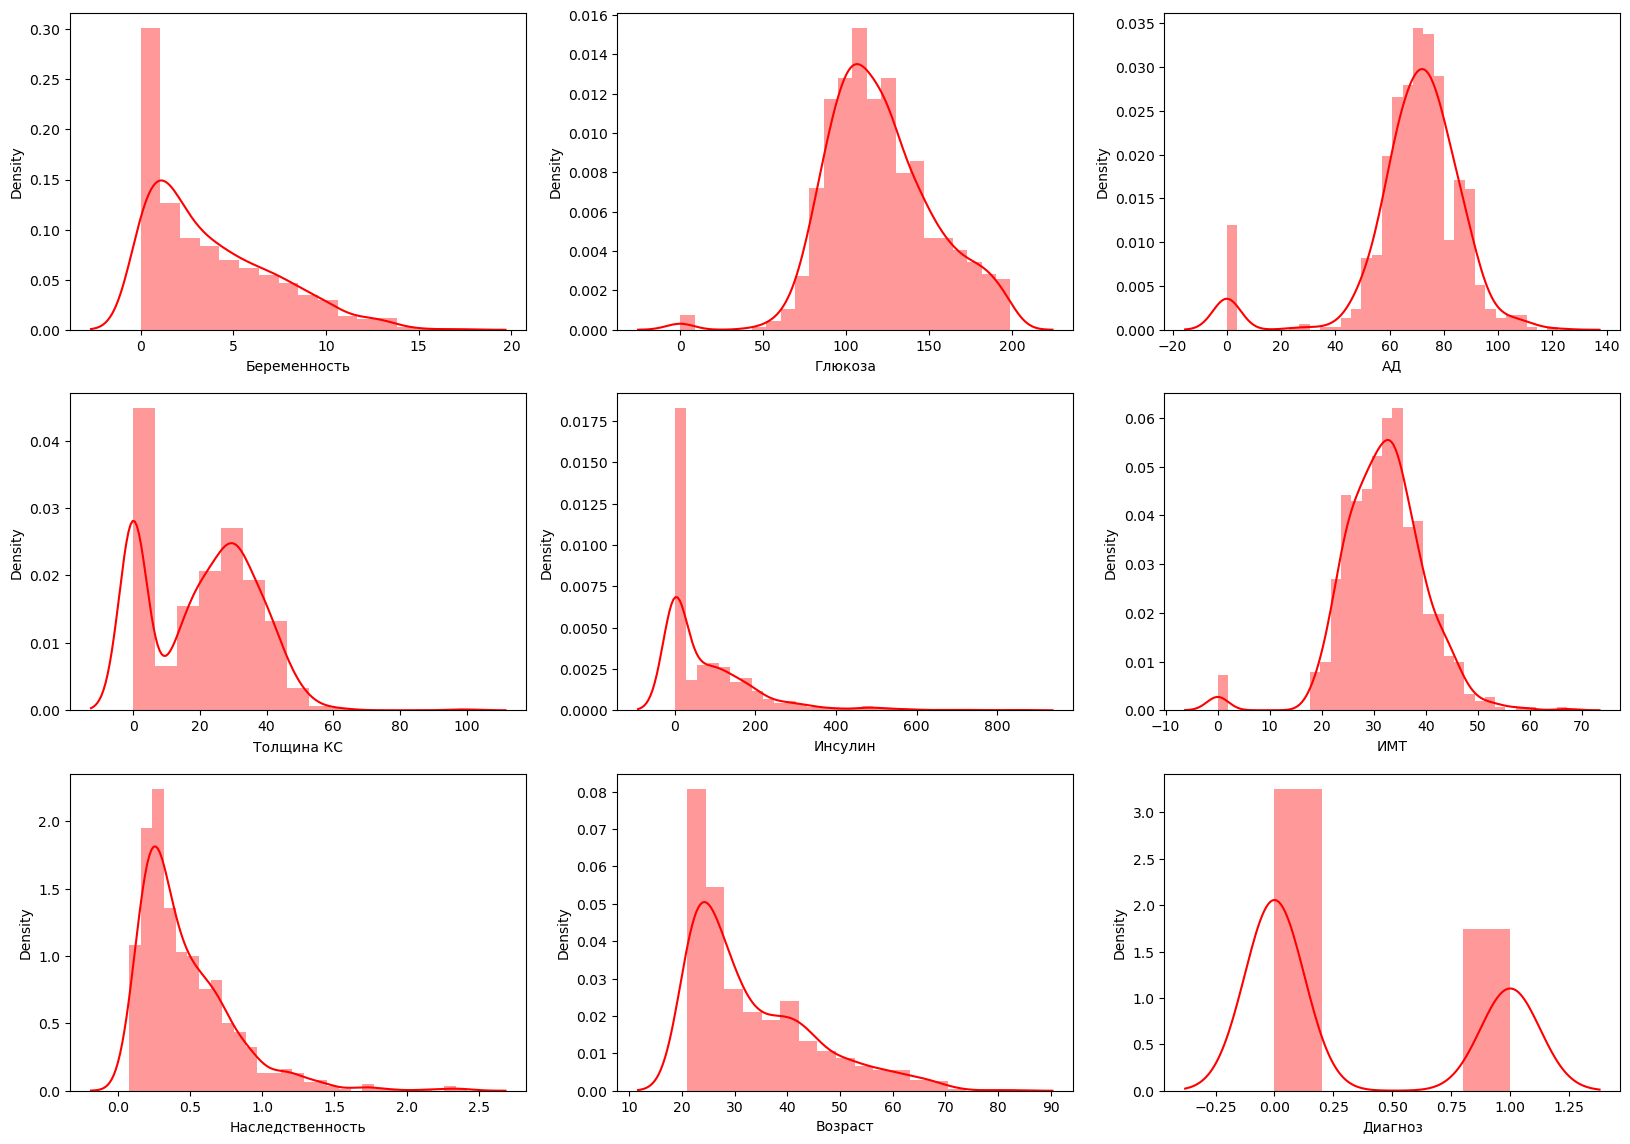

In [19]:
plt.figure(figsize = (20, 14))
for i, col in enumerate(list(diabetes.columns)):
    plt.subplot(3, 3, i+1)
    sns.distplot(diabetes[col], color='red')
plt.show()

#### Проведем корреляционный анализ, чтобы оценить линейную связанность признаков:

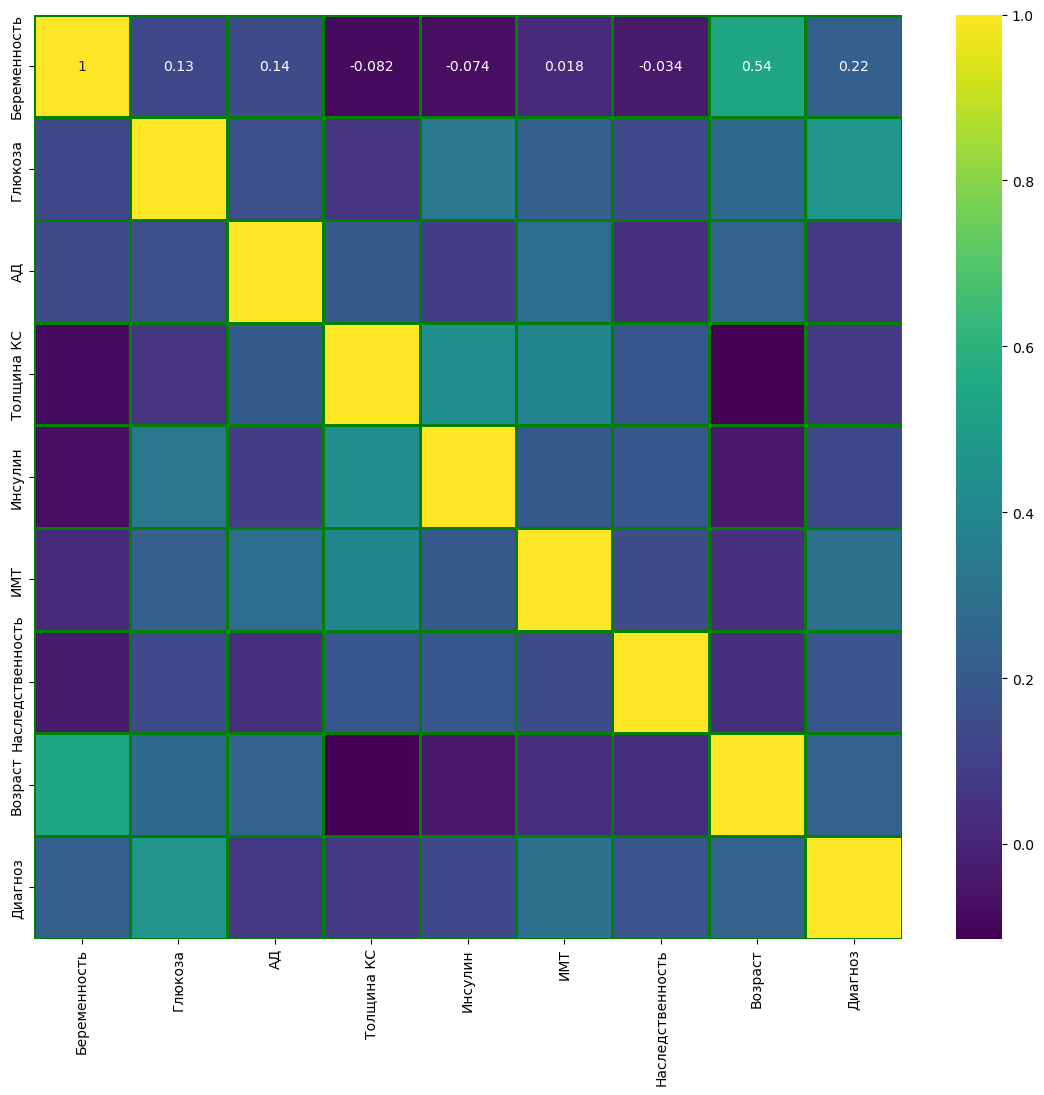

In [28]:
correlation = diabetes.corr()
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, linewidths=1.0, annot=True,cmap='viridis', linecolor="green", annot_kws = {'size':10})
plt.show()

#### Создадим датасет, в котором будут отсутствовать информация о инсулине и толщине КС.

In [29]:
diabetes_clean = diabetes[['Беременность', 'Глюкоза', 'АД', 'ИМТ', 'Наследственность', 'Возраст', 'Диагноз']].copy()

In [30]:
diabetes_clean.shape

(768, 7)

#### Почистим данные.

In [31]:
diabetes_clean = diabetes_clean[(diabetes_clean['Глюкоза'] != 0) & (diabetes_clean['АД'] != 0) & (diabetes_clean['ИМТ'] >= 10) & 
                                (diabetes_clean['ИМТ'] <= 55) & (diabetes_clean['Беременность'] <= 12) & (diabetes_clean['Наследственность'] <= 1)]

In [32]:
diabetes_clean.shape

(660, 7)

In [33]:
diabetes_clean.describe()

,Беременность,Глюкоза,АД,ИМТ,Наследственность,Возраст,Диагноз
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3.693939,120.740909,72.022727,32.125152,0.409967,33.010606,0.319697
std,3.088030,30.170248,12.183639,6.606455,0.220630,11.813737,0.466713
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,115.500000,72.000000,32.000000,0.350000,29.000000,0.000000
75%,6.000000,139.250000,80.000000,36.025000,0.559250,40.000000,1.000000
max,12.000000,198.000000,122.000000,55.000000,0.997000,81.000000,1.000000


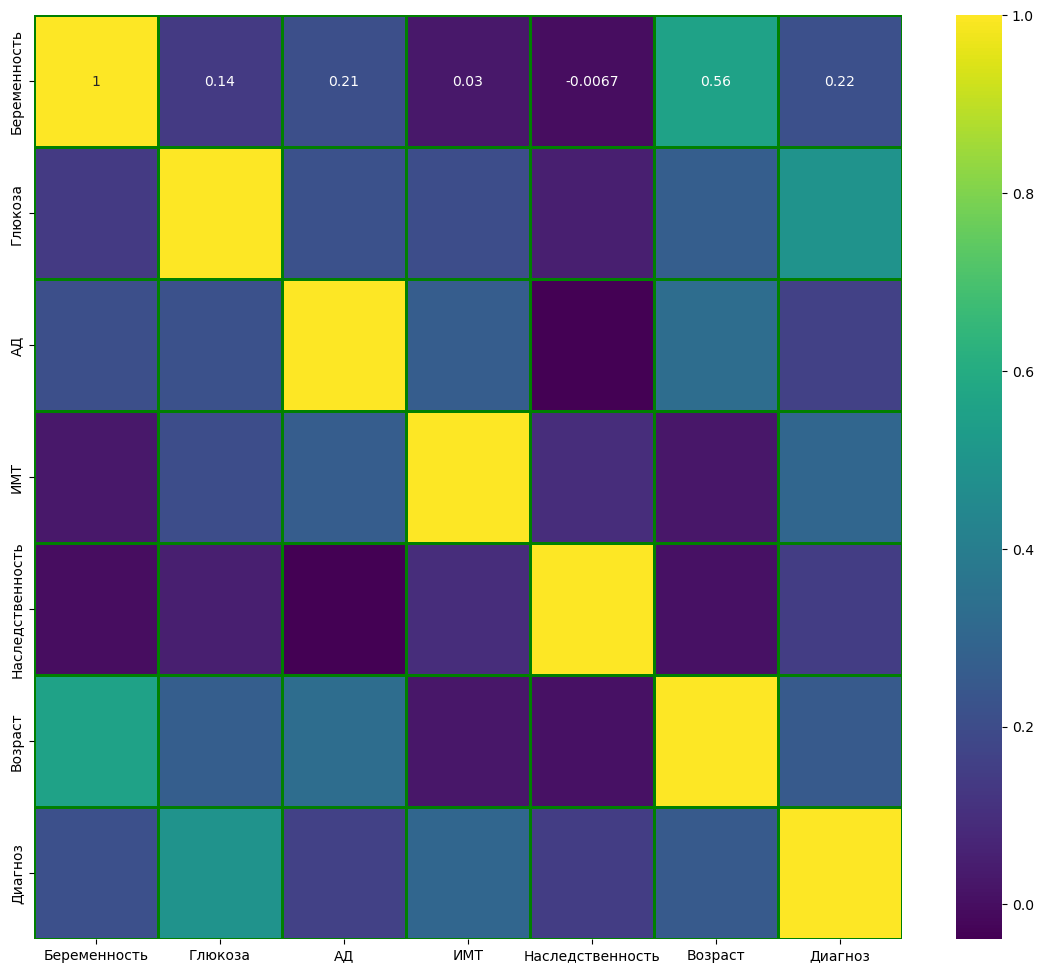

In [34]:
correlation = diabetes_clean.corr()
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, linewidths=1.0, annot=True,cmap='viridis', linecolor="green", annot_kws = {'size':10})
plt.show()

#### Графики распределения.

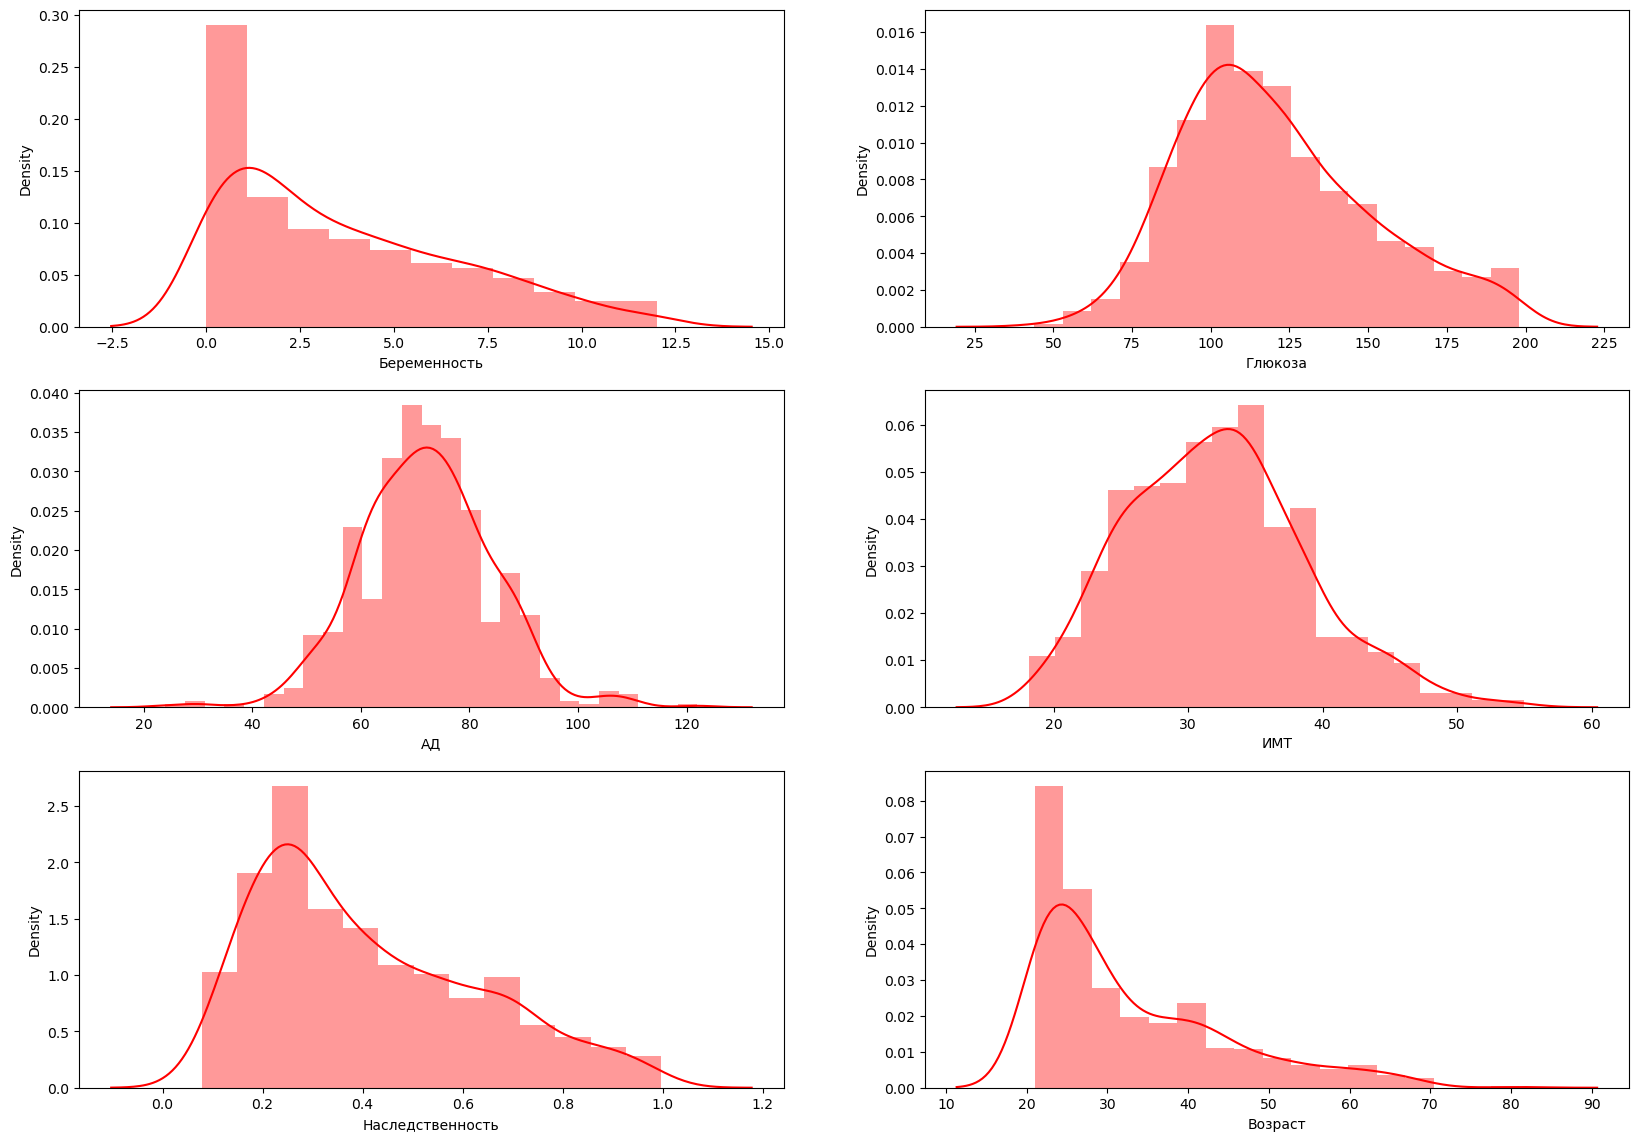

In [35]:
plt.figure(figsize = (20, 14))
for i, col in enumerate(list(diabetes_clean.columns)[:-1]):
    plt.subplot(3, 2, i+1)
    sns.distplot(diabetes_clean[col], color='red')
plt.show()

## Алгоритм backpropagation

#### Разделим выборку на обучающую и тестовую.

In [50]:
X = diabetes_clean[diabetes_clean.columns[:-1]]
y = pd.get_dummies(diabetes_clean[diabetes_clean.columns[-1]]).values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### Создадим сигмоидную функцию

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

####  Создадим функцию, которая представляет собой процесс прямого распространения сигнала в нейронной сети.

In [53]:
def feedforward_propagation(x, W1, W2):
    Z1 = np.dot(x, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    return A1, A2

####  Создадим функцию, которая представляет собой процесс обратного распространения ошибки в нейронной сети. 

In [54]:
def backpropagation_propagation(y, A1, A2, W2):
    L1 = A2 - y
    dW1 = L1 * A2 * (1 - A2)

    L2 = np.dot(dW1, W2.T)
    dW2 = L2 * A1 * (1 - A1)

    return dW1, dW2

#### Создадим функцию, которая выполняет обновление весов нейронной сети с использованием градиентов, вычисленных в процессе обратного распространения ошибки.

In [55]:
def update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate):
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    return W1, W2

#### Создадим функцию, которая вычисляет точность предсказаний модели

In [56]:
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

#### Создадим функцию, которая вычисляет среднеквадратичную ошибку между предсказанными значениями y_pred и истинными значениями y_true

In [57]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum()/(y_pred.size)

####  Создадим функцию, которая реализует процесс обучения нейронной сети с использованием алгоритма обратного распространения ошибки

In [58]:
def backpropagation(x, y, learning_rate = 0.01, epoch = 10000, hidden_size = 8):
    results = pd.DataFrame(columns=["mse", "accuracy"])

    N = x.shape[0]
    input_size = x.shape[1]
    output_size = y.shape[1]

    W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
    W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

    for eph in range(epoch+1):    
        
        A1, A2 = feedforward_propagation(x, W1, W2)
    
        mse = mean_squared_error(A2, y)
        acc = accuracy(A2, y)
        results = results._append({'mse': mse, 'accuracy': acc}, ignore_index = True)
        if eph%(epoch//10)==0:
            print(f"epoch {eph}: \n\tmse: {mse}, \taccuracy: {acc}")
        
        dW1, dW2 = backpropagation_propagation(y, A1, A2, W2)
        W1, W2 = update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate)

    return W1, W2, results

In [59]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, hidden_size = 128, learning_rate = 0.1)

epoch 0: 
	mse: 0.30435573186195414, 	accuracy: 0.6755793226381461
epoch 10000: 
	mse: 0.146171285556556, 	accuracy: 0.7967914438502673
epoch 20000: 
	mse: 0.13551047180332515, 	accuracy: 0.8163992869875223
epoch 30000: 
	mse: 0.12670489853516817, 	accuracy: 0.8324420677361853
epoch 40000: 
	mse: 0.12204491875537335, 	accuracy: 0.8342245989304813
epoch 50000: 
	mse: 0.11805702202337905, 	accuracy: 0.839572192513369
epoch 60000: 
	mse: 0.11807567011708271, 	accuracy: 0.8377896613190731
epoch 70000: 
	mse: 0.11281536672007898, 	accuracy: 0.8484848484848485
epoch 80000: 
	mse: 0.10939459877604052, 	accuracy: 0.8645276292335116
epoch 90000: 
	mse: 0.10902521909785441, 	accuracy: 0.8591800356506238
epoch 100000: 
	mse: 0.10596486768291899, 	accuracy: 0.8645276292335116


#### Оценим точность на тестовых данных.

In [60]:
A1, A2 = feedforward_propagation(X_test, W1, W2)
acc = accuracy(A2, y_test)
acc

0.6868686868686869

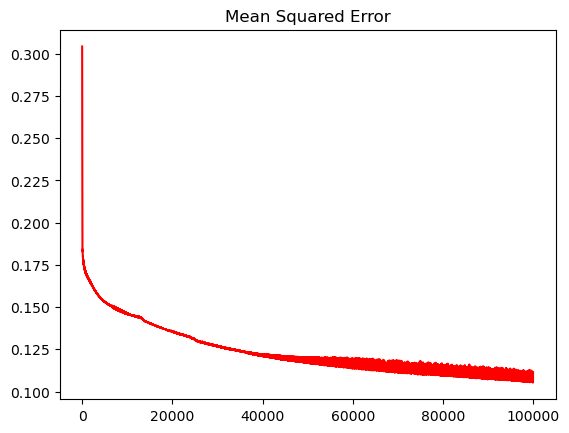

In [62]:
results.mse.plot(title="Mean Squared Error", color='red')
plt.show()

#### Оценим график точности.

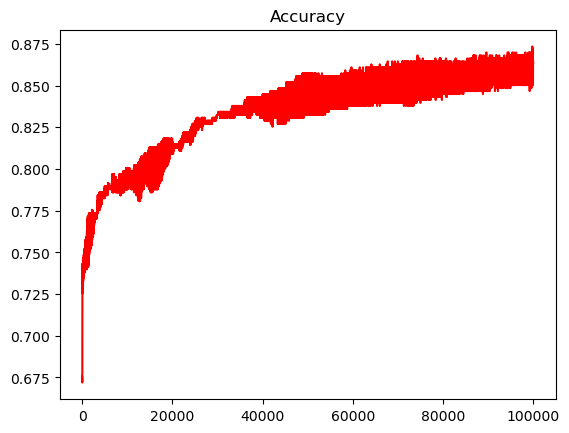

In [63]:
results.accuracy.plot(title="Accuracy", color='red')
plt.show()

#### Представим значения полноты, точности и ф-меры.

In [64]:
print(classification_report(y_test.argmax(axis=1), A2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        70
           1       0.47      0.48      0.47        29

    accuracy                           0.69        99
   macro avg       0.62      0.63      0.63        99
weighted avg       0.69      0.69      0.69        99



#### Построим матрицу спутанности.

In [65]:
cm = confusion_matrix(y_test.argmax(axis=1), A2.argmax(axis=1))

print('Матрица путанности:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Матрица путанности:
 [[54 16]
 [15 14]]

True Positives(TP) =  54
True Negatives(TN) =  14
False Positives(FP) =  16
False Negatives(FN) =  15


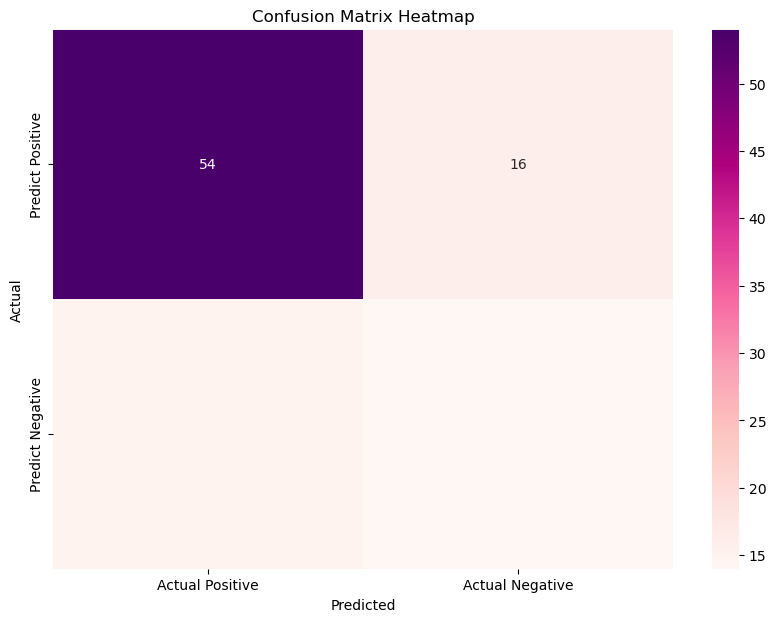

In [67]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                         index=['Predict Positive', 'Predict Negative'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

#### Построим ROC-AUC кривую.

In [68]:
fpr, tpr, _ = roc_curve(y_test.argmax(axis=1), A2.argmax(axis=1), pos_label=1)
roc_auc = roc_auc_score(y_test.argmax(axis=1), A2.argmax(axis=1))
print(f'Roc Auc coeff: {roc_auc}')

Roc Auc coeff: 0.6270935960591133


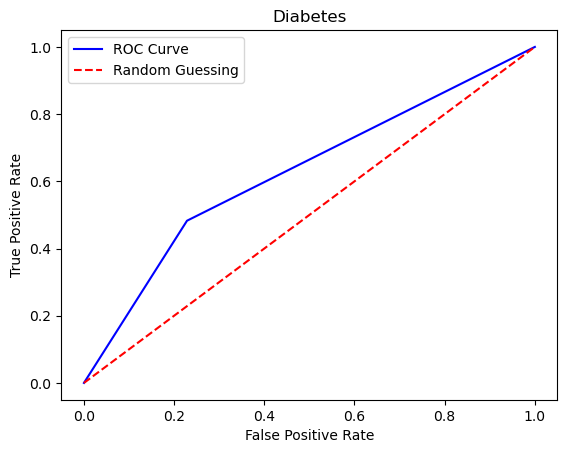

In [70]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), '--', color='red', label='Random Guessing')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Diabetes')

plt.legend()

plt.show()